In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2,SelectKBest
import plotly.express as px
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
#from pandas_profiling import ProfileReport

# 1.Problem Statement

In [2]:
Your Client FinMan is a financial services company that provides various financial services like loan, 
investment funds, insurance etc. to its customers.
FinMan wishes to cross-sell health insurance to the existing customers
who may or may not hold insurance policies with the company. 
The company recommend health insurance to it's customers based on their profile once these customers land on the website. 
Customers might browse the recommended health insurance policy and consequently fill up a form to apply.
When these customers fill-up the form,
their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert 
and thus the company can sell proposed health insurance to these leads in a more efficient manner..

SyntaxError: invalid syntax (3223294871.py, line 1)

In [ ]:
Response (Target)
0 : Customer did not show interest in the recommended policy
1 : Customer showed interest in the recommended policy


-0) ID	Unique Identifier for a row
-1) City_Code	Code for the City of the customers
-2) Region_Code	Code for the Region of the customers
-3) Accomodation_Type	Customer Owns or Rents the house
-4) RecoInsuranceType	Joint or Individual type for the recommended insurance
-5) Upper_Age	Maximum age of the customer
-6)Lower _Age	Minimum age of the customer
-7) Is_Spouse	If the customers are married to each other
-8) NaN(in case of joint insurance)
-9) Health_Indicator	Encoded values for health of the customer
-10) HoldingPolicyDuration	Duration (in years) of holding policy (a policy that customer has already subscribed to with the -company)
-11) HoldingPolicyType	Type of holding policy
-12) RecoPolicyCat	Encoded value for recommended health insurance
-13) RecoPolicyPremium	Annual Premium (INR) for the recommended health insurance

# 2.Data Gathering Train Data

In [3]:
df_train=pd.read_csv('train.csv')
df_train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [18]:
df_train['Reco_Policy_Cat'].uniqu()

array([22, 19, 16, 17,  1, 18, 21, 13, 20,  9,  2,  4, 12,  6, 14, 11,  3,
        8,  7, 10, 15,  5], dtype=int64)

In [4]:
df_train.shape

(50882, 14)

In [5]:
df_train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [6]:
df_train.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [8]:
df_train.drop(['Region_Code','ID'],axis=1,inplace=True)

In [9]:
# Target column
df_train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [10]:
df_train['Response'].value_counts(normalize=True)

0    0.760053
1    0.239947
Name: Response, dtype: float64

<AxesSubplot:ylabel='Response'>

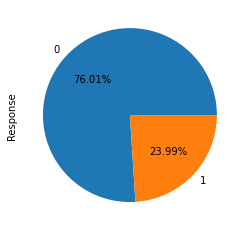

In [11]:
df_train['Response'].value_counts().plot(kind='pie',labels=['0','1'],autopct='%1.2f%%')

In [12]:
#sns.pairplot(df_train, hue='Response', height=2)

# 3.EDA Train Data

In [13]:
df_train['Accomodation_Type'].value_counts(normalize=True)

Owned     0.54933
Rented    0.45067
Name: Accomodation_Type, dtype: float64

In [14]:
df_train['Reco_Insurance_Type'].value_counts(normalize=True)

Individual    0.796667
Joint         0.203333
Name: Reco_Insurance_Type, dtype: float64

In [13]:
for column in df_train:
    if df_train[column].nunique():
        display(df_train.groupby(column).median())
#plt.savefig("object_columns_mean")


,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
City_Code,,,,,,
C1,56.0,53.0,3.0,18.0,16100.0,0.0
C10,42.0,39.0,3.0,18.0,12738.0,0.0
C11,43.0,38.0,3.0,19.0,12694.0,0.0
C12,41.0,38.0,2.0,16.0,12609.0,0.0
C13,40.0,36.0,3.0,16.0,11466.0,0.0
C14,44.0,42.0,3.0,18.0,12750.0,0.0
C15,46.0,41.0,2.0,19.0,14432.0,0.0
C16,33.0,29.0,2.0,18.0,10548.0,0.0
C17,40.0,37.0,2.0,15.0,11799.2,0.0


,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Accomodation_Type,,,,,,
Owned,52.0,49.0,3.0,17.0,15598.0,0.0
Rented,31.0,30.0,2.0,17.0,10496.0,0.0


,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Reco_Insurance_Type,,,,,,
Individual,41.0,41.0,3.0,17.0,11693.0,0.0
Joint,54.0,40.0,3.0,17.0,22080.0,0.0


,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Upper_Age,,,,,
18,18.0,NaN,15.0,6540.0,0.0
19,19.0,NaN,16.0,6120.0,0.0
20,20.0,NaN,16.0,7230.0,0.0
21,21.0,2.0,16.0,6995.0,0.0
22,22.0,2.0,17.0,7240.0,0.0
23,23.0,3.0,17.0,7068.0,0.0
24,24.0,3.0,17.0,7190.0,0.0
25,25.0,3.0,17.0,8291.0,0.0
26,26.0,3.0,17.0,8400.0,0.0


,Upper_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Lower_Age,,,,,
16,45.0,3.0,17.0,19980.0,0.0
17,47.0,3.0,16.0,20959.2,0.0
18,42.0,3.0,16.0,17780.0,0.0
19,19.0,3.0,16.0,7824.0,0.0
20,20.0,3.0,16.0,8304.0,0.0
21,21.0,2.0,16.0,7692.0,0.0
22,22.0,3.0,17.0,7700.0,0.0
23,23.0,3.0,17.0,7524.0,0.0
24,24.0,3.0,17.0,7524.0,0.0


,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Is_Spouse,,,,,,
No,41.0,39.0,3.0,17.0,11980.0,0.0
Yes,54.0,45.0,3.0,17.0,21888.0,0.0


,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Health Indicator,,,,,,
X1,43.0,39.0,3.0,17.0,12820.0,0.0
X2,45.0,42.0,3.0,17.0,13462.4,0.0
X3,42.0,37.0,2.0,17.0,12400.0,0.0
X4,44.0,41.0,3.0,17.0,13596.0,0.0
X5,47.0,44.0,3.0,18.0,15015.0,0.0
X6,45.0,38.0,2.0,15.0,12833.1,0.0
X7,53.0,49.0,3.0,18.0,15984.0,0.0
X8,49.0,46.0,3.0,13.5,14012.0,0.0
X9,44.0,41.0,3.0,14.0,12460.0,0.0


,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Holding_Policy_Duration,,,,,,
1.0,40.0,37.0,2.0,17.0,12560.0,0.0
10.0,54.0,51.0,3.0,17.0,16044.0,0.0
11.0,55.5,52.0,3.0,18.0,16640.0,0.0
12.0,55.0,53.0,3.0,18.0,15960.0,0.0
13.0,56.0,53.0,3.0,17.0,16281.0,0.0
14+,60.0,57.0,3.0,18.0,17238.0,0.0
14.0,57.0,55.0,3.0,17.0,16957.0,0.0
2.0,42.0,39.0,3.0,17.0,12865.0,0.0
3.0,44.0,40.0,3.0,17.0,13354.0,0.0


,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response
Holding_Policy_Type,,,,,
1.0,45.0,42.0,16.0,13580.0,0.0
2.0,47.0,44.0,17.0,14036.0,0.0
3.0,51.0,48.0,18.0,15048.0,0.0
4.0,54.0,51.0,17.0,16040.0,0.0


,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Premium,Response
Reco_Policy_Cat,,,,,
1,43.0,39.0,2.0,12276.0,0.0
2,41.0,38.0,1.0,11574.0,0.0
3,46.0,44.0,3.0,14180.0,0.0
4,38.0,36.0,3.0,11600.0,0.0
5,51.0,48.0,3.0,15092.0,0.0
6,40.0,36.0,3.0,12260.0,0.0
7,50.0,46.5,3.0,13818.0,0.0
8,44.0,41.0,3.0,13574.0,0.0
9,41.0,38.0,3.0,12762.0,0.0


,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Response
Reco_Policy_Premium,,,,,
2280.0,19.0,19.0,NaN,1.0,0.0
2304.0,19.0,19.0,NaN,2.0,0.0
2380.0,19.0,19.0,NaN,16.0,0.0
2400.0,19.0,19.0,NaN,2.0,0.0
2408.0,18.5,18.5,NaN,15.0,0.5
...,...,...,...,...,...
42256.0,75.0,71.0,3.0,22.0,0.0
42316.8,75.0,26.0,1.0,22.0,1.0
42739.2,74.0,72.0,NaN,21.0,0.0


,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
Response,,,,,
0,44.0,41.0,3.0,17.0,13140.0
1,44.0,40.0,3.0,18.0,13280.0


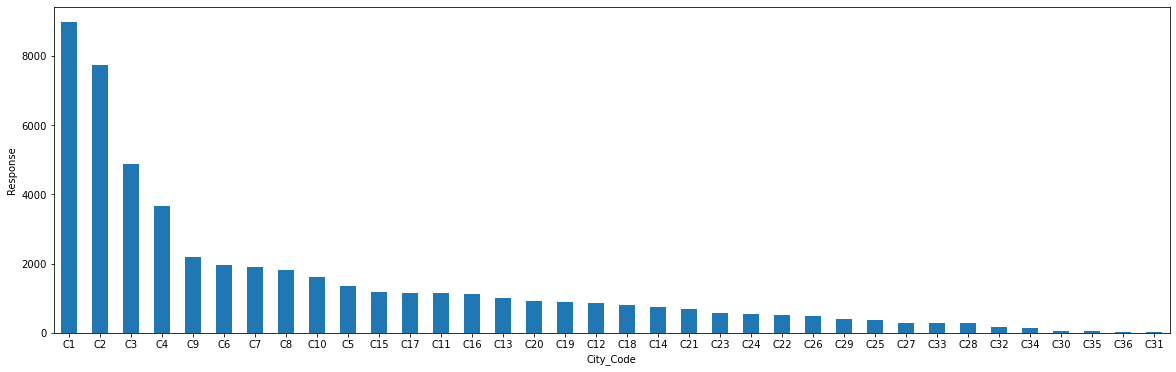

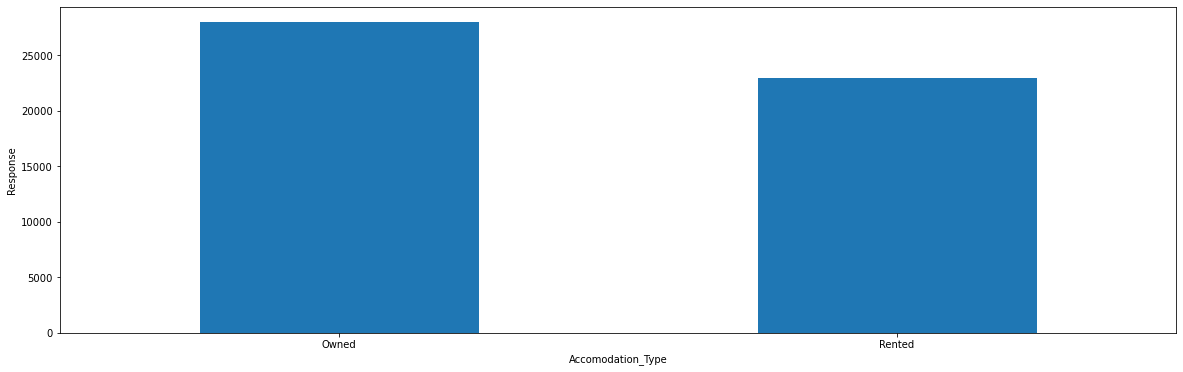

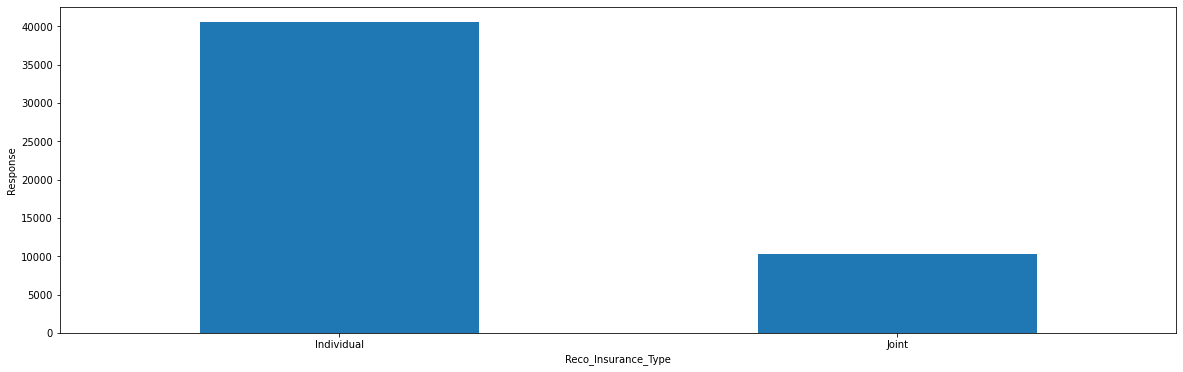

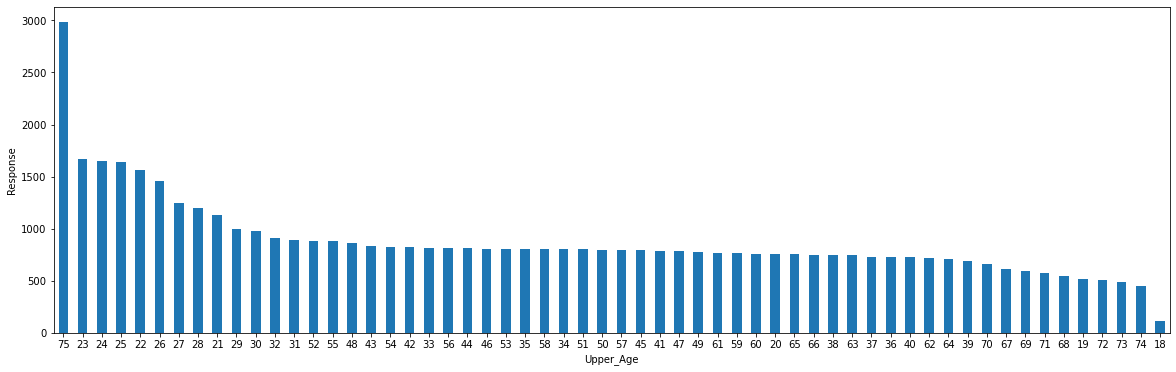

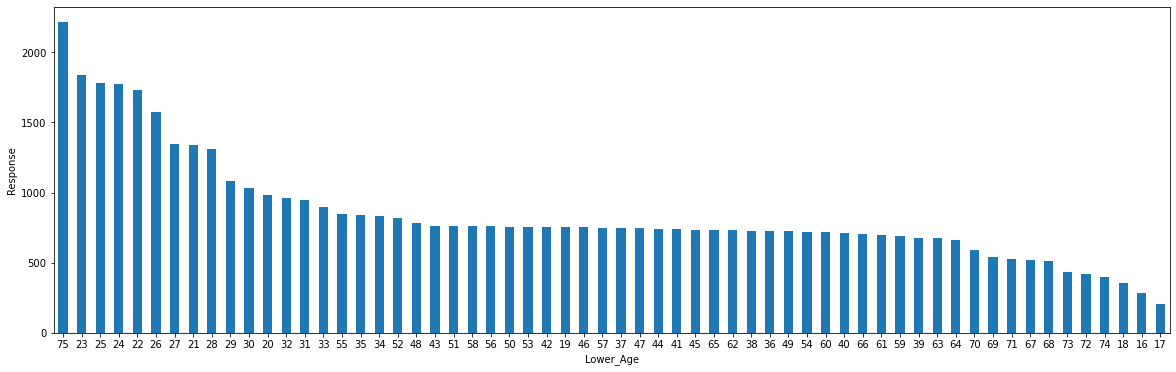

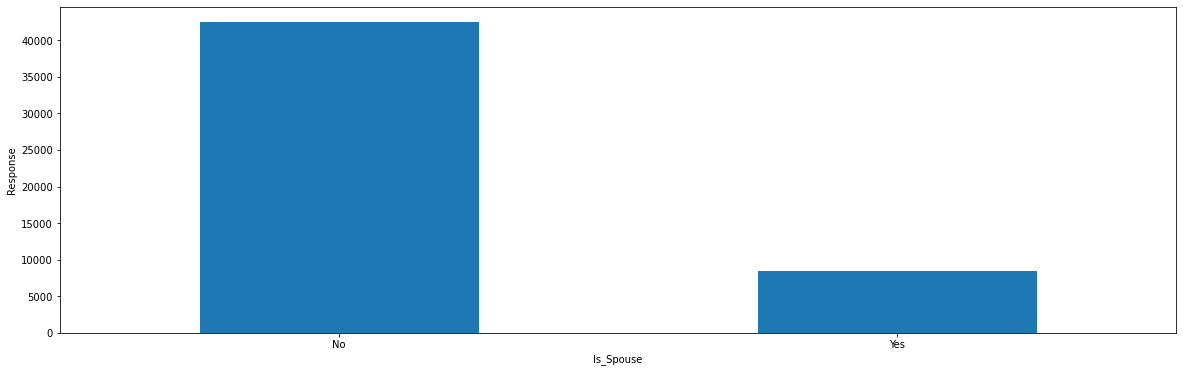

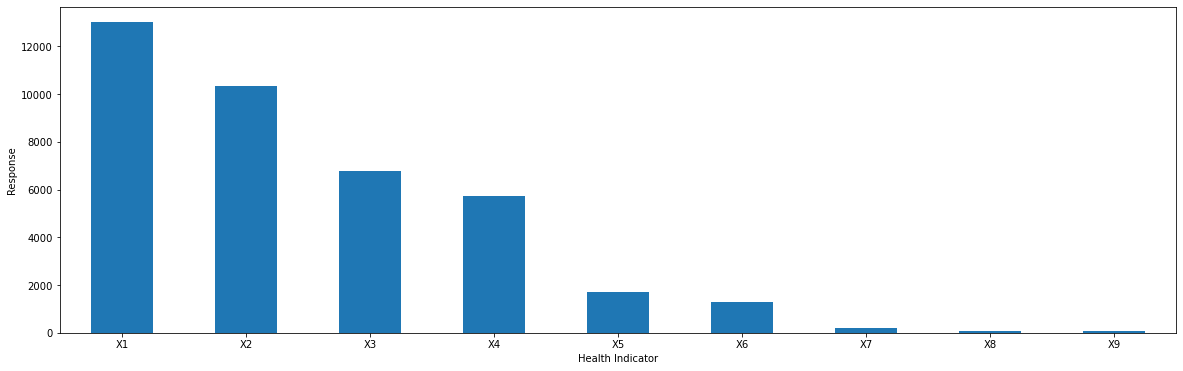

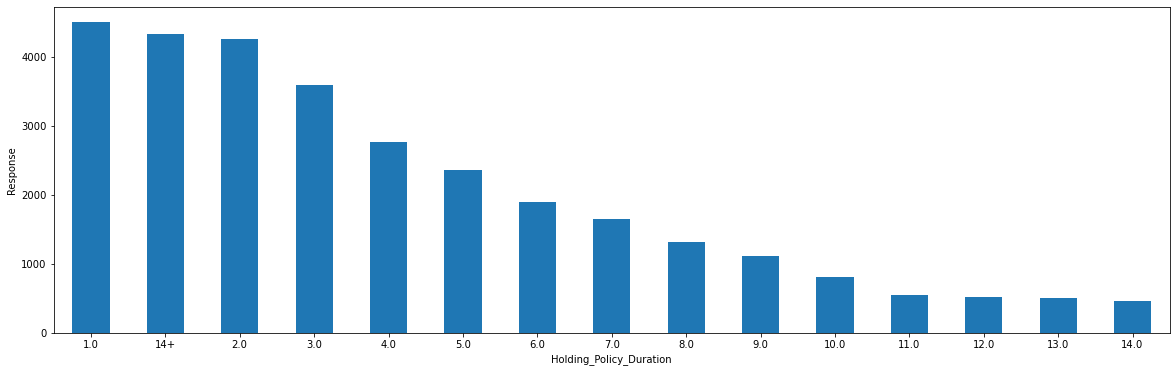

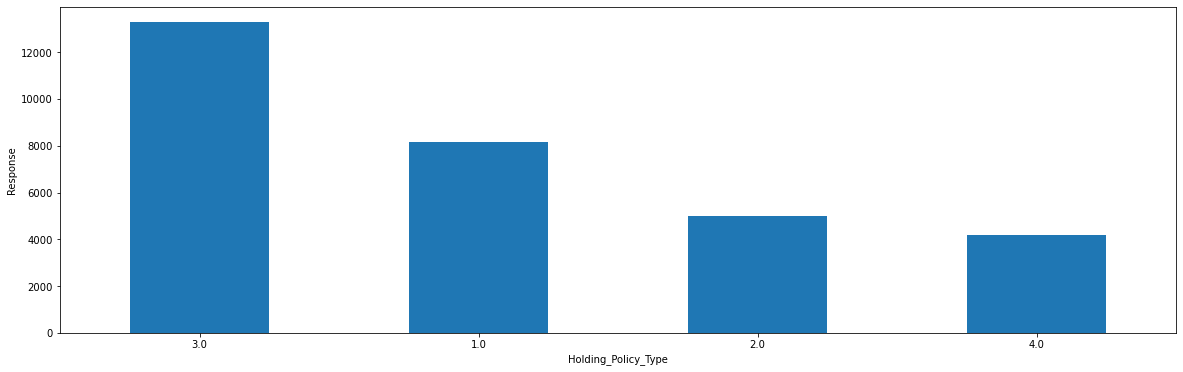

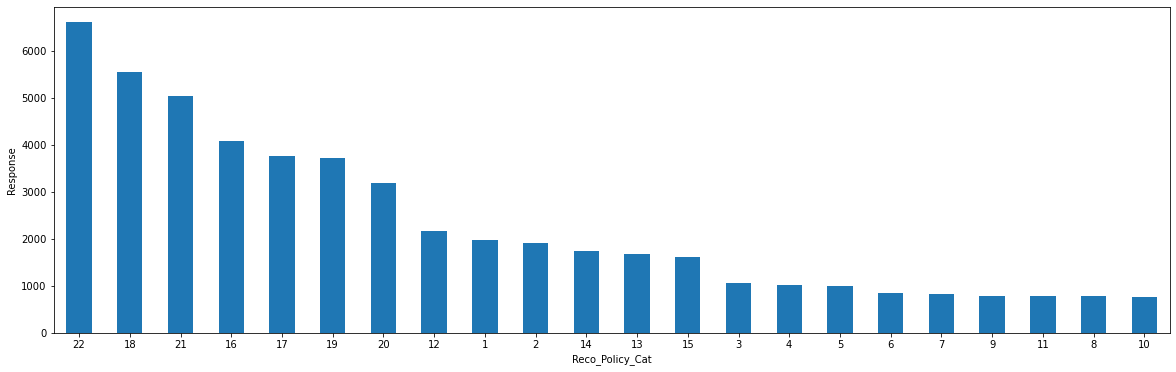

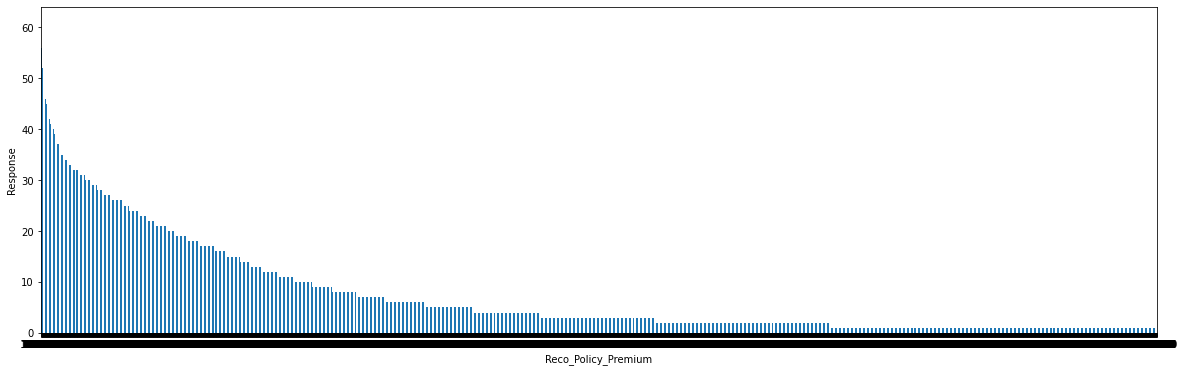

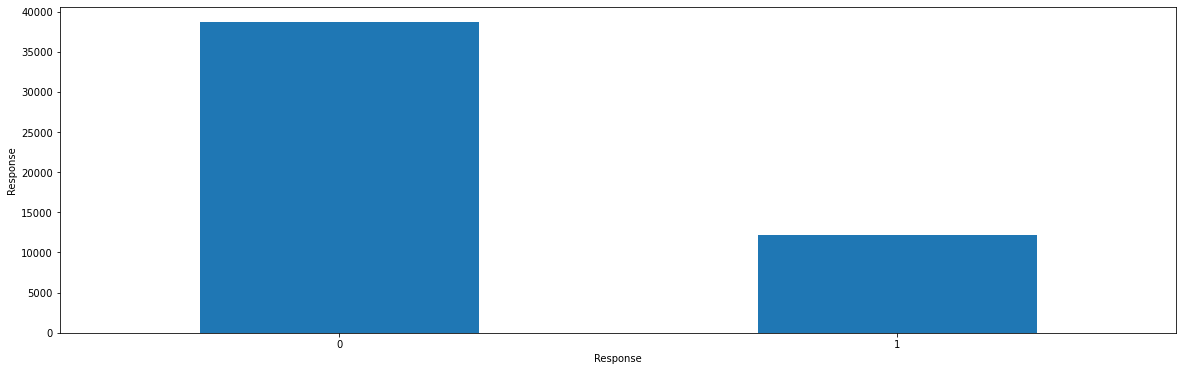

In [14]:
for column in df_train:    
    plt.figure(figsize=(20,6))
    df_train[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Response")
    plt.xticks(rotation = 0);
    

feature : City_Code
feature : Accomodation_Type
feature : Reco_Insurance_Type
feature : Upper_Age
feature : Lower_Age
feature : Is_Spouse
feature : Health Indicator
feature : Holding_Policy_Duration
feature : Holding_Policy_Type
feature : Reco_Policy_Cat
feature : Reco_Policy_Premium
feature : Response


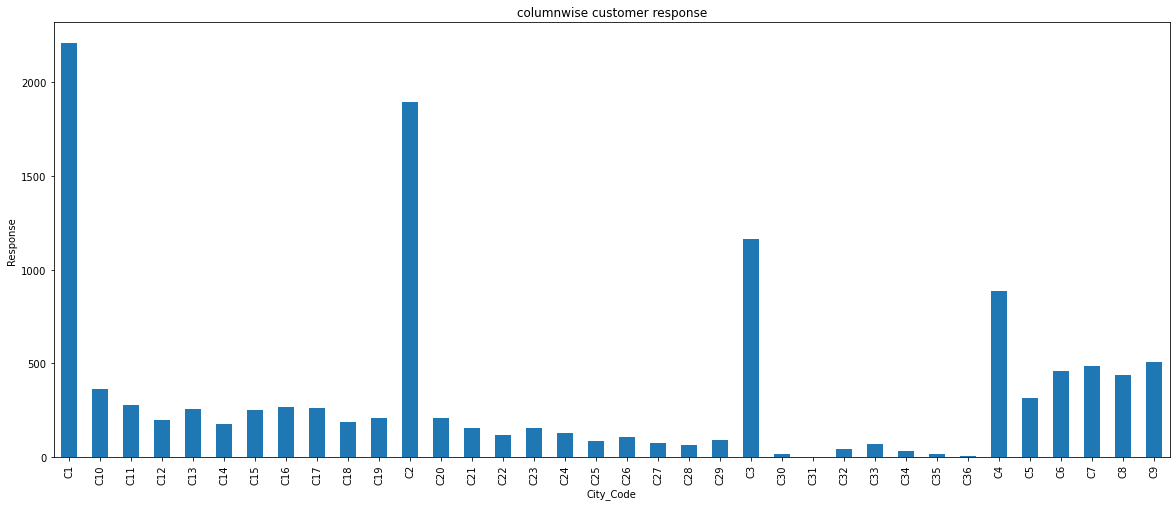

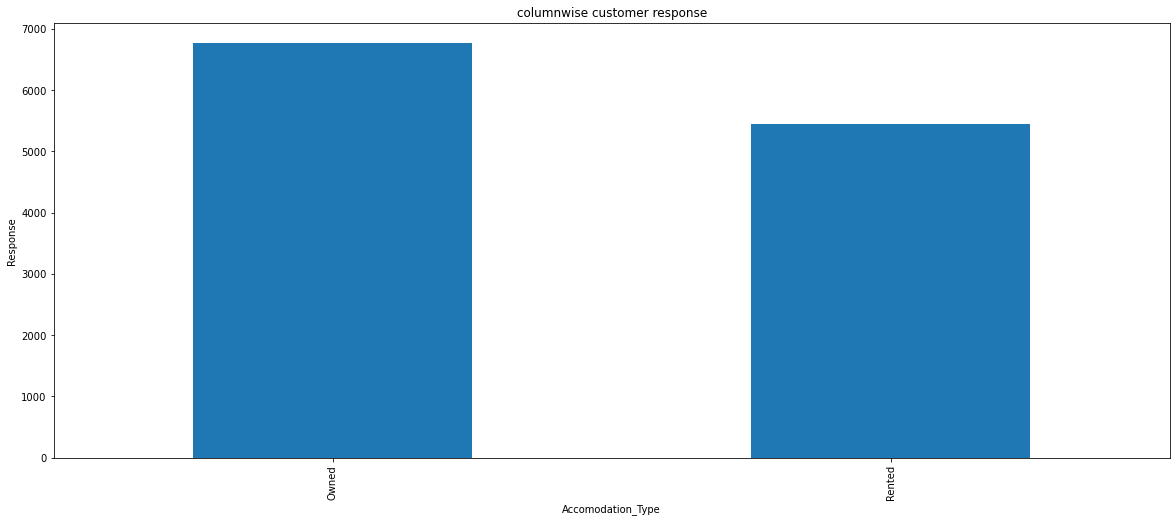

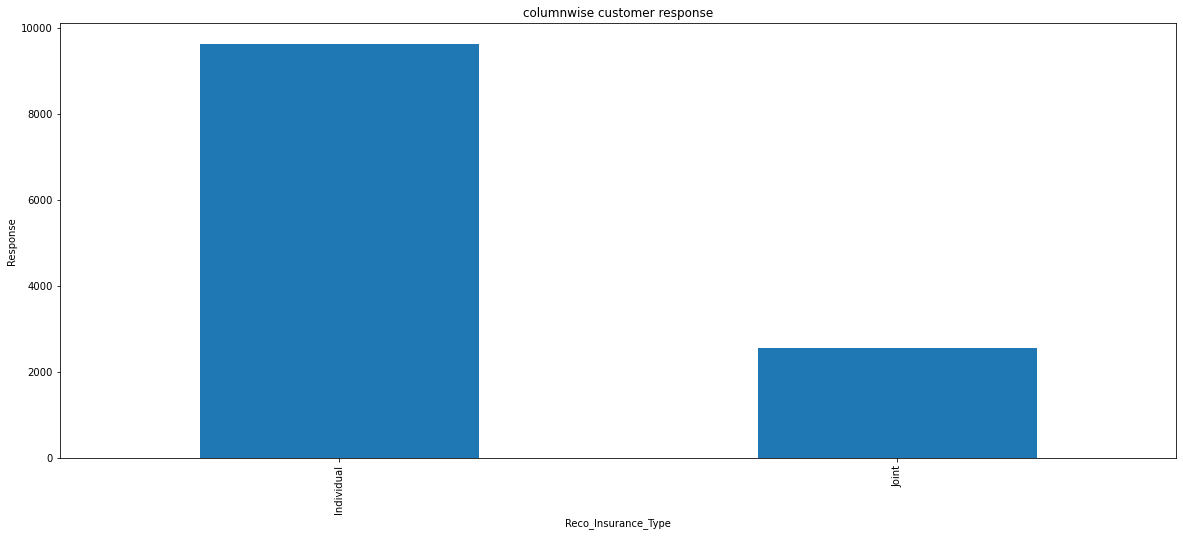

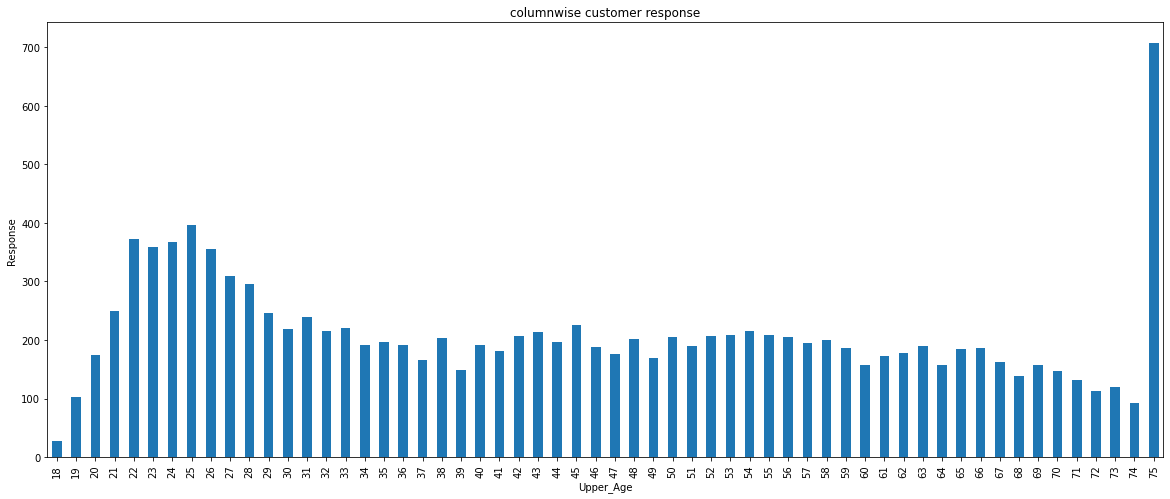

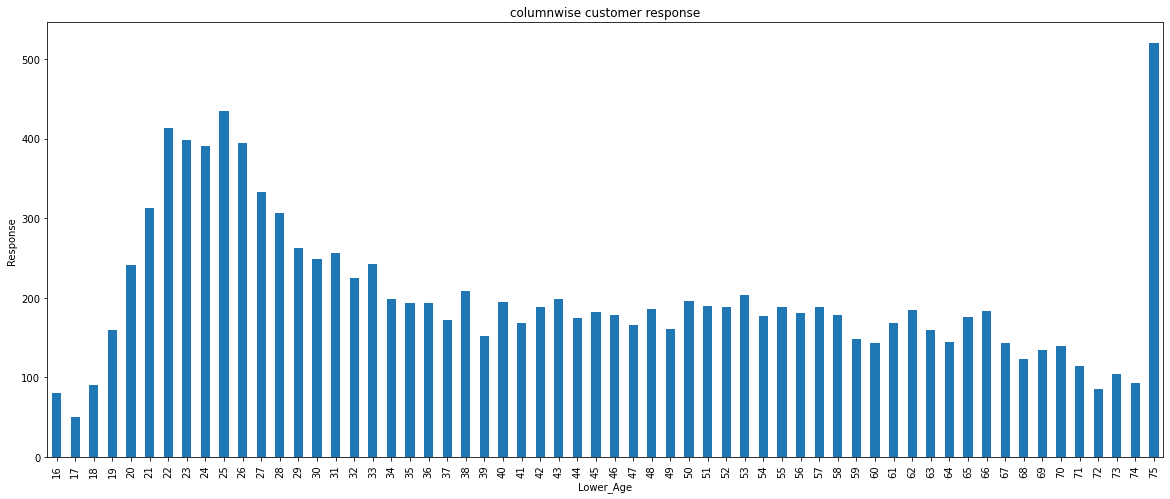

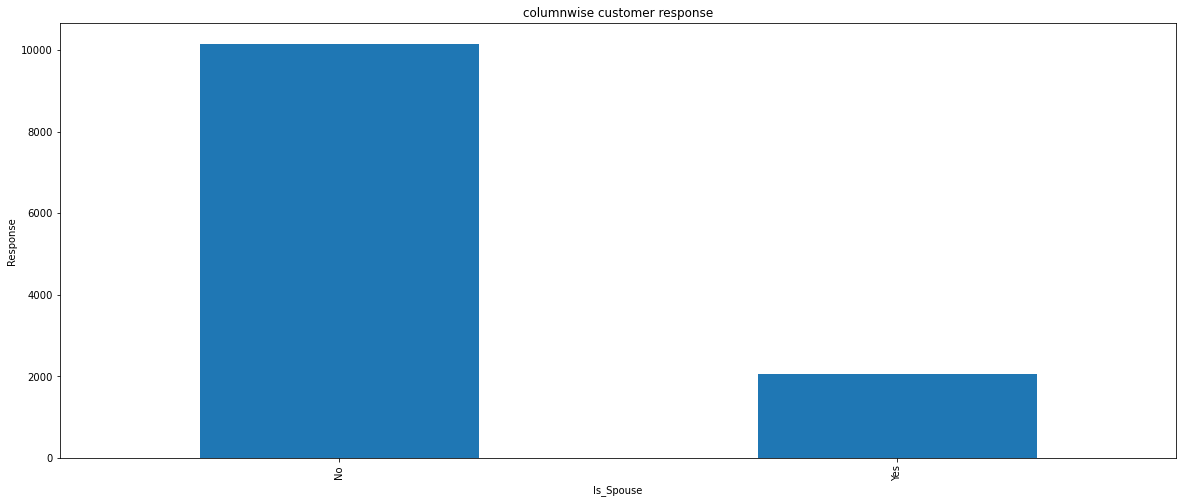

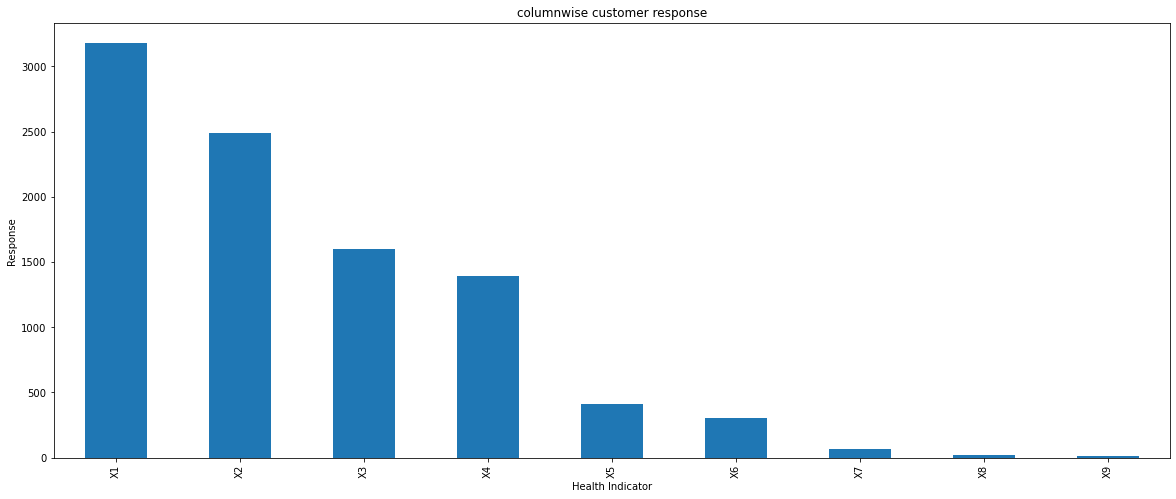

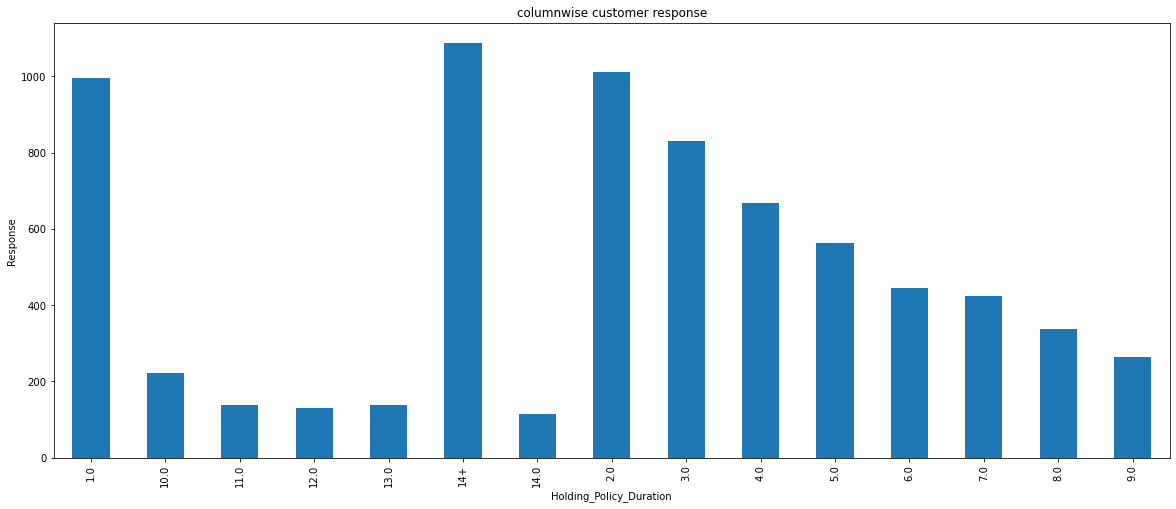

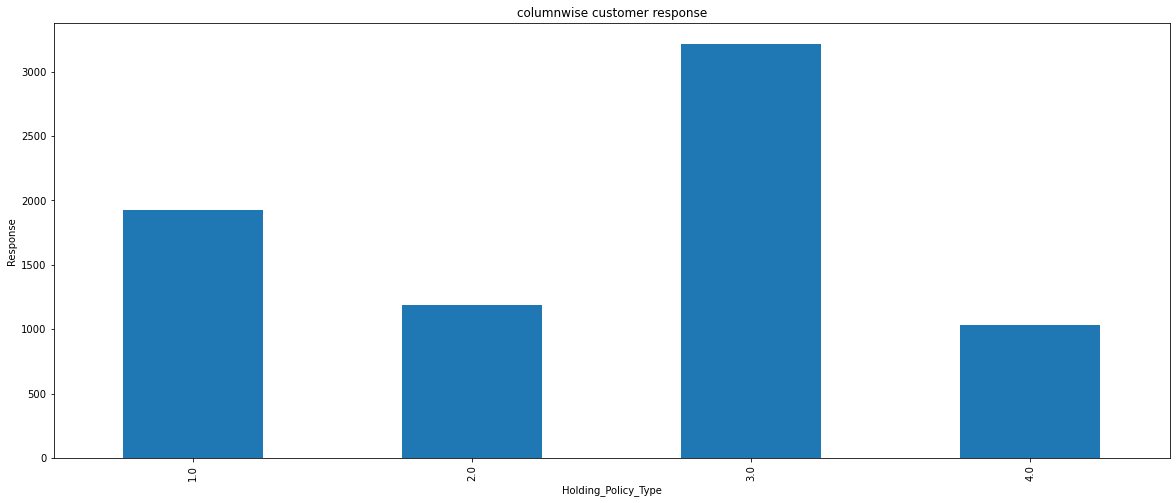

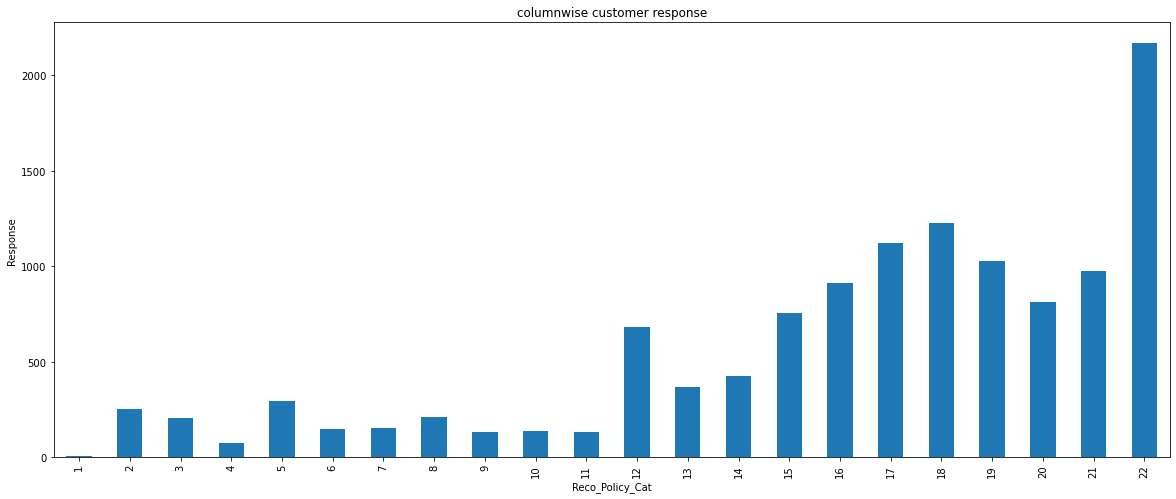

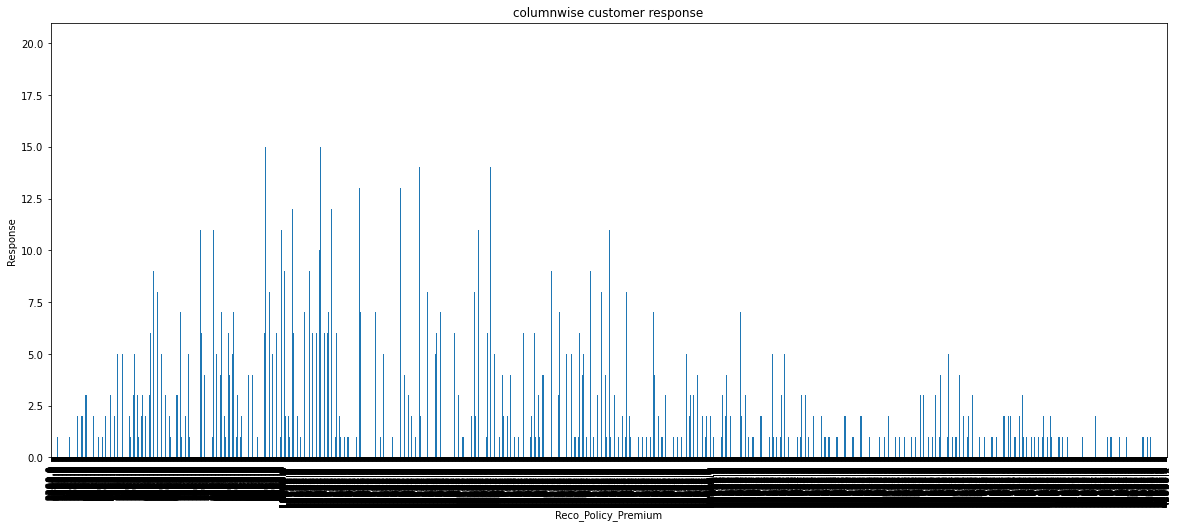

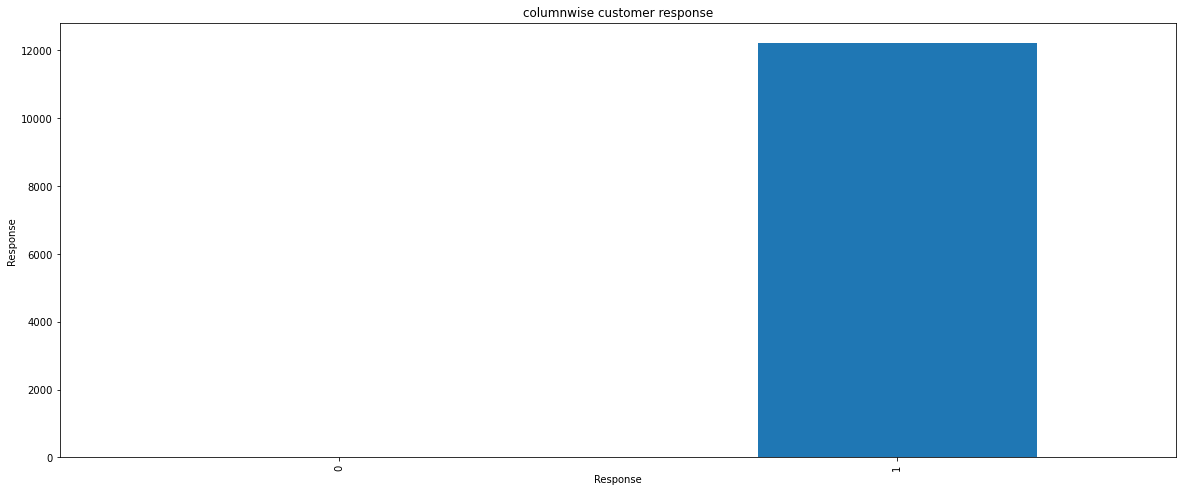

In [15]:
for column in df_train:
    print("feature :", column)
    x=df_train.groupby(column).Response.sum()
    fig=plt.figure(figsize=(20,8))
    ax=fig.add_subplot(1,1,1)
    ax.set_xlabel(column)
    ax.set_ylabel("Response")
    ax.set_title("columnwise customer response")
    x.plot(kind="bar")
    fig.show()

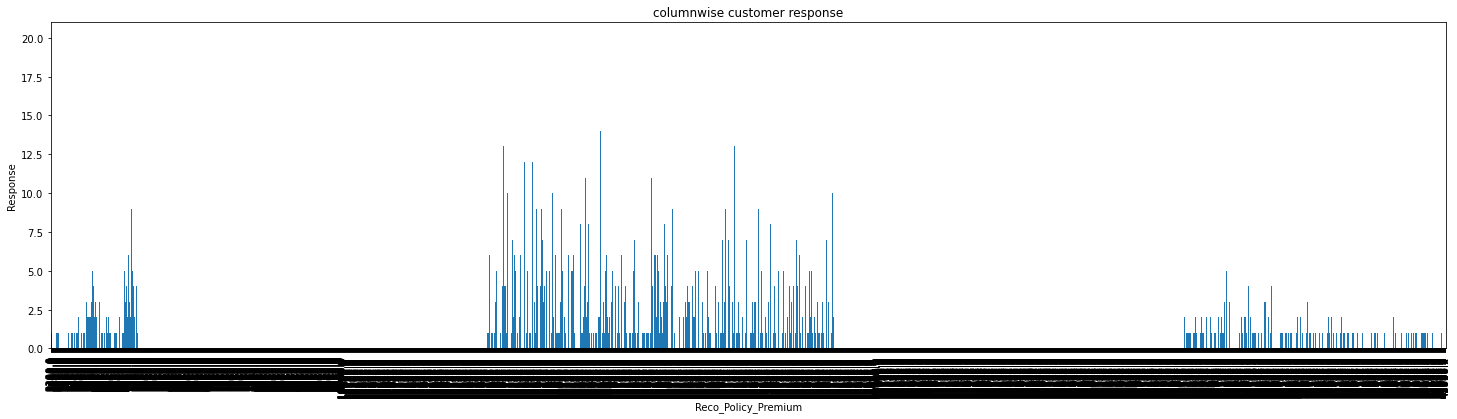

In [15]:
x=df_train.groupby('Reco_Policy_Premium').Response.sum()
fig=plt.figure(figsize=(25,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Reco_policy_Premium')
ax.set_ylabel("Response")
ax.set_title("columnwise customer response")
x.plot(kind="bar")
fig.show()

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='Response'>

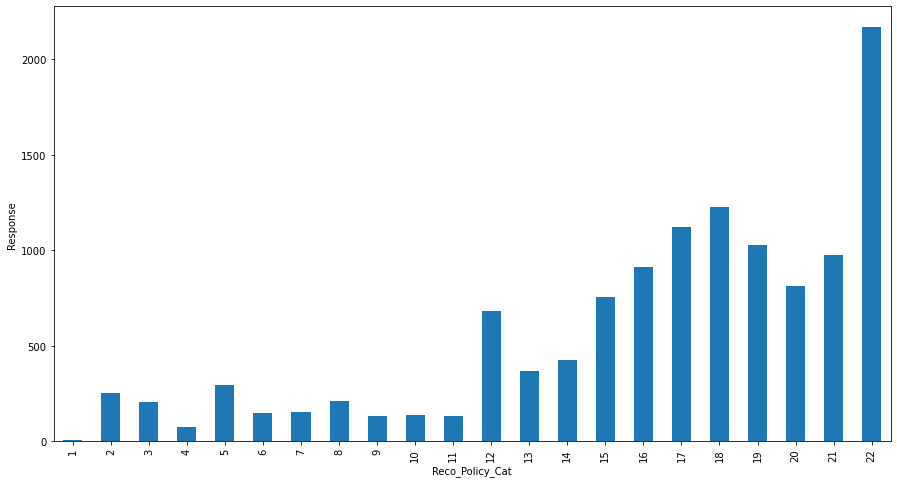

In [16]:
x=df_train.groupby('Reco_Policy_Cat').Response.sum()
ax=plt.figure(figsize=(15,8))#add_subplot(1,1,1)
plt.xlabel('Reco_Policy_Cat')
plt.ylabel('Response')
x.plot(kind='bar')

# 4. Feature Engineering Train Data

In [16]:
column_list=df_train.columns.tolist()
for i in column_list:
    print(i)
    print(df_train[i].unique(),end='\n')
    print(end='\n')

City_Code
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']

Accomodation_Type
['Rented' 'Owned']

Reco_Insurance_Type
['Individual' 'Joint']

Upper_Age
[36 75 32 52 44 28 59 21 66 20 27 34 43 55 23 18 22 25 24 40 26 56 35 63
 49 64 67 42 71 57 73 31 19 48 65 54 33 30 69 68 37 29 62 58 38 39 60 41
 45 51 46 70 61 74 53 72 50 47]

Lower_Age
[36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25 24 56 35 63
 64 67 75 42 71 68 31 19 65 54 33 74 30 69 29 62 58 39 60 57 41 40 45 37
 51 59 49 38 46 70 61 53 16 72 50 17]

Is_Spouse
['No' 'Yes']

Health Indicator
['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']

Holding_Policy_Duration
['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']

Holding_Policy_Type
[ 3. nan  1.  4.  2.]

Reco_Policy_Cat
[22 19 16 17  1 18 21 13 20  9  2

## 4.1 Encoding

In [17]:
df_train['City_Code'].replace({'C3':3, 'C5':5, 'C24':24, 'C8':8, 'C9':9, 'C1':1, 'C15':15,
                               'C28':28, 'C27':27, 'C7':7, 'C20':20, 'C25':25, 'C4':4,
                              'C2':2, 'C34':34, 'C10':10, 'C17':17, 'C18':18, 'C16':16, 'C29':29,
                               'C33':33, 'C26':26, 'C19':19, 'C6':6, 'C12':12,
 'C13':13, 'C11':11, 'C14':14, 'C22':22, 'C23':23, 'C21':21, 'C36':36, 'C32':32, 'C30':30, 'C35':35, 'C31':31},inplace=True)
df_train['Accomodation_Type'].replace({'Rented':0, 'Owned':1},inplace=True)
df_train['Reco_Insurance_Type'].replace({'Individual':0, 'Joint':1},inplace=True)
df_train['Is_Spouse'].replace({'No':0, 'Yes':1},inplace=True)
df_train['Health Indicator'].replace({'X1':1, 'X2':2, 'X4':4, 'X3':3, 'X6':6, 'X5':5, 'X8':8, 'X7':7, 'X9':9},inplace=True)

df_train['Holding_Policy_Duration'].replace({'14+':14.0,'NaN':'nan'},inplace=True)



In [18]:
df_train.select_dtypes(include='object')

,Holding_Policy_Duration
0,14.0
1,NaN
2,1.0
3,14.0
4,3.0
...,...
50877,NaN
50878,7.0
50879,14.0
50880,2.0


## 4.2 Fill Missing Value

In [19]:
knn_imputer = KNNImputer(n_neighbors=1)
result = knn_imputer.fit_transform(df_train)
new_df_train = pd.DataFrame(result, columns=df_train.columns)
new_df_train

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,3.0,0.0,0.0,36.0,36.0,0.0,1.0,14.0,3.0,22.0,11628.0,0.0
1,5.0,1.0,1.0,75.0,22.0,0.0,2.0,2.0,2.0,22.0,30510.0,0.0
2,5.0,1.0,0.0,32.0,32.0,0.0,1.0,1.0,1.0,19.0,7450.0,1.0
3,24.0,1.0,1.0,52.0,48.0,0.0,1.0,14.0,3.0,19.0,17780.0,0.0
4,8.0,0.0,0.0,44.0,44.0,0.0,2.0,3.0,1.0,16.0,10404.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,4.0,0.0,0.0,22.0,22.0,0.0,3.0,3.0,3.0,18.0,7704.0,0.0
50878,5.0,0.0,0.0,27.0,27.0,0.0,3.0,7.0,3.0,4.0,5408.0,0.0
50879,1.0,0.0,0.0,63.0,63.0,0.0,2.0,14.0,1.0,12.0,11374.0,0.0
50880,1.0,1.0,1.0,71.0,49.0,0.0,2.0,2.0,2.0,16.0,28179.2,1.0


In [20]:
new_df_train.isna().sum()

City_Code                  0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

### 4.3 outliers

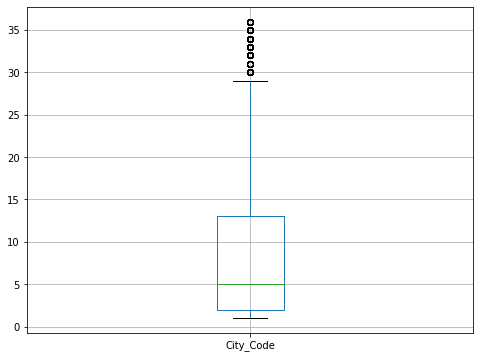

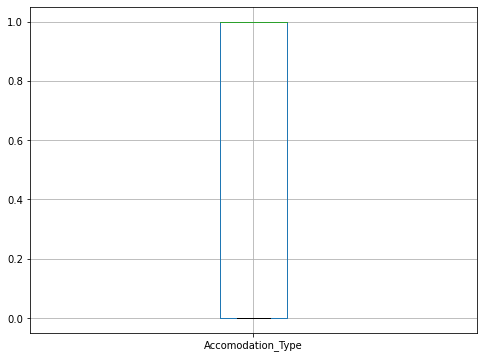

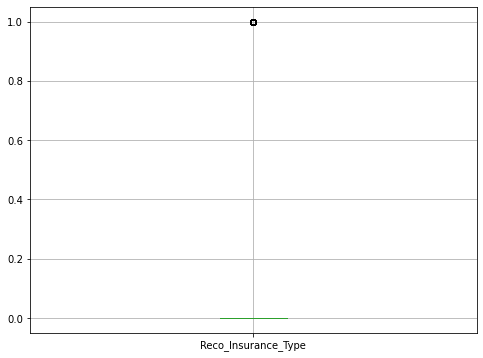

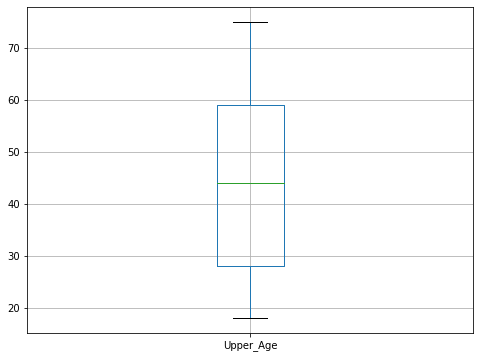

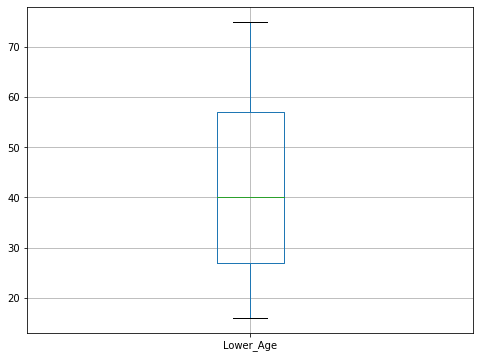

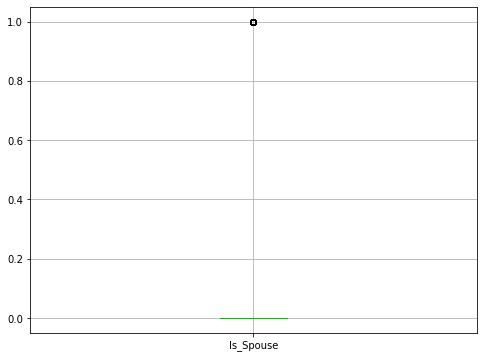

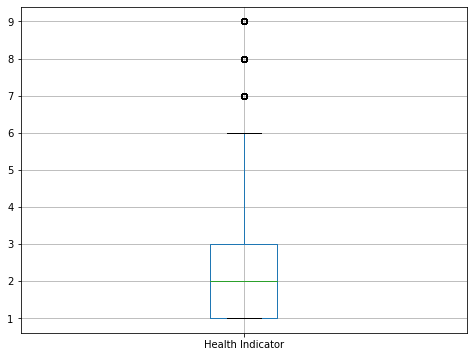

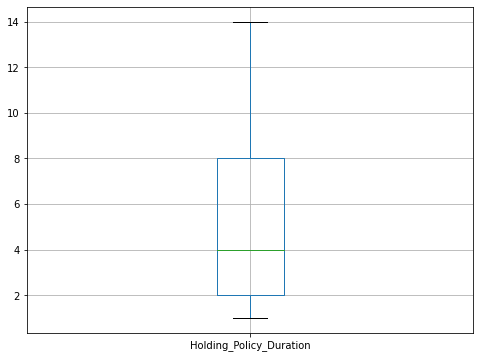

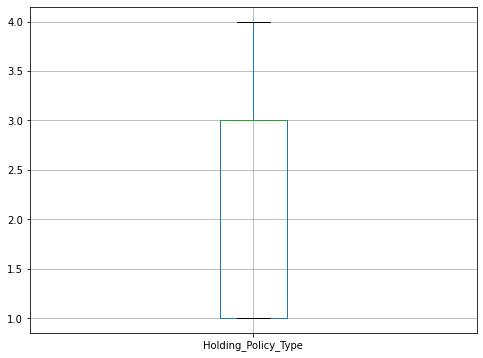

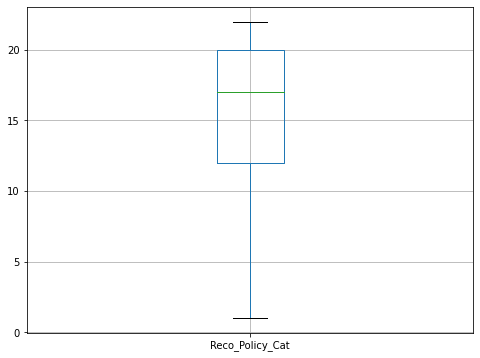

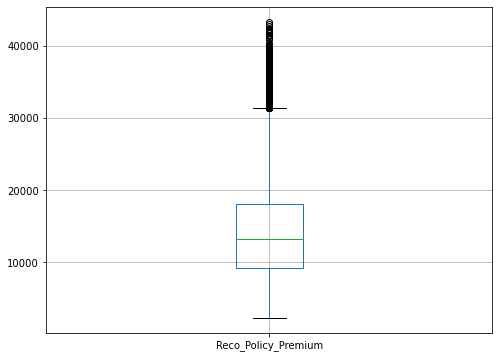

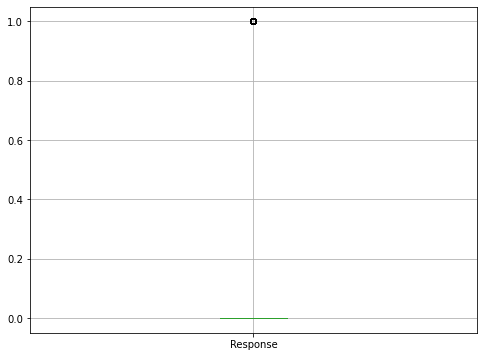

<Figure size 432x288 with 0 Axes>

In [23]:
for column in new_df_train:
    plt.figure(figsize=(8,6))
    fig=new_df_train[[column]].boxplot()
    plt.show()
plt.savefig("boxplot1")

<AxesSubplot:xlabel='Reco_Policy_Premium'>

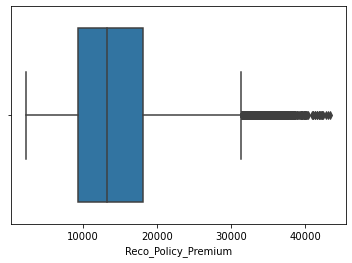

In [24]:
sns.boxplot(new_df_train['Reco_Policy_Premium'])

In [25]:
q1=new_df_train['Reco_Policy_Premium'].quantile(0.25)
q3=new_df_train['Reco_Policy_Premium'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit

31368.0

<AxesSubplot:xlabel='Reco_Policy_Premium'>

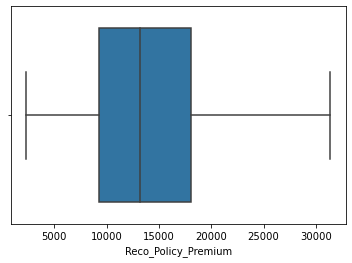

In [26]:
new_df_train['Reco_Policy_Premium']=np.where(new_df_train['Reco_Policy_Premium']>upper_limit,upper_limit,
                                             new_df_train['Reco_Policy_Premium'])
sns.boxplot(new_df_train['Reco_Policy_Premium'])

<AxesSubplot:ylabel='Density'>

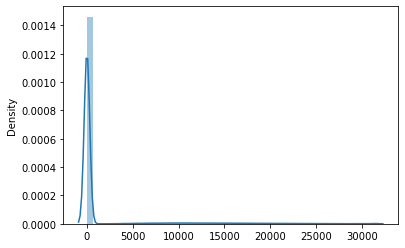

In [27]:
sns.distplot(new_df_train)

In [28]:
from scipy.stats import shapiro, kstest, normaltest
_ , p_val = shapiro(new_df_train)
print('P_Value :',p_val)
if p_val >= 0.05 :
    print('Null Hypothesis is True')
    print('Data is normally distributed')
    
else:
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P_Value : 0.0
Alternate Hypothesis is True
Data is not normally distributed


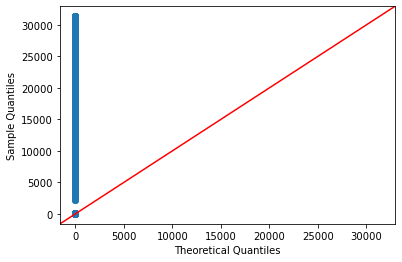

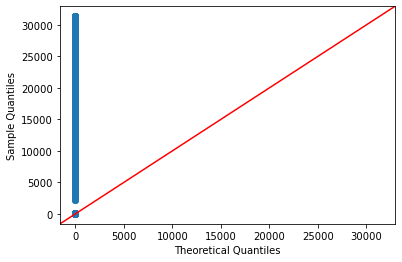

In [29]:
import scipy.stats as sts
import statsmodels.api as sm
sm.qqplot(new_df_train, line = '45')

### Data is not normally distributed

# 2.Data Gathering Test Data

In [60]:
df_test=pd.read_csv('test.csv')
df_test

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [61]:
df_test.shape

(21805, 13)

In [62]:
df_test.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')

In [63]:
df_test.isna().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [64]:
df_test.drop(['ID', 'Region_Code'],axis=1,inplace=True)

In [65]:
#sns.pairplot(df_train, hue='Response', height=2)

# 3.EDA Test Data

In [66]:
##for column in df_train:
#    if df_train[column].nunique():
#        display(df_train.groupby(column).median())
#plt.savefig("object_columns_mean"

In [67]:
#for column in df_train:    
#    plt.figure(figsize=(20,6))
#    df_train[column].value_counts().plot(kind="bar")
#    plt.xlabel(column)
#    plt.ylabel("Response")
#    plt.xticks(rotation = 0);
    

In [68]:
#for column in df_train:
#    print("feature :", column)
#    x=df_train.groupby(column).Response.sum()
#    fig=plt.figure(figsize=(15,6))
#    ax=fig.add_subplot(1,1,1)
#    ax.set_xlabel(column)
#    ax.set_ylabel("Response")
#    ax.set_title("columnwise customer response")
#    x.plot(kind="bar")
#    fig.show()

In [69]:
#sns.distplot(new_df_train)

# 4.Feature Engineering Test data

In [70]:
column_list=df_test.columns.tolist()
for i in column_list:
    print(i)
    print(df_test[i].unique(),end='\n')
    print(end='\n')

City_Code
['C1' 'C4' 'C3' 'C2' 'C13' 'C18' 'C16' 'C17' 'C11' 'C7' 'C21' 'C34' 'C14'
 'C8' 'C12' 'C6' 'C10' 'C9' 'C23' 'C32' 'C26' 'C15' 'C24' 'C20' 'C19' 'C5'
 'C28' 'C30' 'C25' 'C29' 'C27' 'C33' 'C22' 'C36' 'C35' 'C31']

Accomodation_Type
['Owned' 'Rented']

Reco_Insurance_Type
['Individual' 'Joint']

Upper_Age
[30 69 28 23 75 24 56 41 22 38 42 31 35 46 44 29 60 54 27 71 68 55 36 59
 72 33 47 63 45 66 26 67 64 57 51 37 70 25 65 34 21 52 61 58 49 43 48 40
 50 39 32 53 62 19 20 18 74 73]

Lower_Age
[30 68 28 23 75 24 56 41 22 37 38 42 31 35 44 29 60 54 27 71 66 36 26 47
 63 45 59 67 64 57 43 46 61 25 70 69 65 72 55 34 21 52 19 58 33 53 49 48
 40 50 39 32 17 51 74 62 20 18 73 16]

Is_Spouse
['No' 'Yes']

Health Indicator
[nan 'X1' 'X3' 'X2' 'X5' 'X4' 'X7' 'X6' 'X9' 'X8']

Holding_Policy_Duration
['6.0' '3.0' '2.0' nan '14+' '5.0' '1.0' '4.0' '12.0' '11.0' '7.0' '9.0'
 '13.0' '8.0' '14.0' '10.0']

Holding_Policy_Type
[ 3.  4. nan  1.  2.]

Reco_Policy_Cat
[ 5 18 17 16 22 21 19 20 11  9 14

## 4.1 Encoding

In [71]:
df_test['City_Code'].replace({'C3':3, 'C5':5, 'C24':24, 'C8':8, 'C9':9, 'C1':1, 'C15':15,
                               'C28':28, 'C27':27, 'C7':7, 'C20':20, 'C25':25, 'C4':4,
                              'C2':2, 'C34':34, 'C10':10, 'C17':17, 'C18':18, 'C16':16, 'C29':29,
                               'C33':33, 'C26':26, 'C19':19, 'C6':6, 'C12':12,
 'C13':13, 'C11':11, 'C14':14, 'C22':22, 'C23':23, 'C21':21, 'C36':36, 'C32':32, 'C30':30, 'C35':35, 'C31':31},inplace=True)
df_test['Accomodation_Type'].replace({'Rented':0, 'Owned':1},inplace=True)
df_test['Reco_Insurance_Type'].replace({'Individual':0, 'Joint':1},inplace=True)
df_test['Is_Spouse'].replace({'No':0, 'Yes':1},inplace=True)
df_test['Health Indicator'].replace({'X1':1, 'X2':2, 'X4':4, 'X3':3, 'X6':6, 'X5':5, 'X8':8, 'X7':7, 'X9':9},inplace=True)

df_test['Holding_Policy_Duration'].replace({'14+':14.0,'NaN':'nan'},inplace=True)


## 4.2 Fill Missing Values

In [72]:
knn_imputer = KNNImputer(n_neighbors=1)
result = knn_imputer.fit_transform(df_test)
new_df_test = pd.DataFrame(result, columns=df_test.columns)
new_df_test

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1.0,1.0,0.0,30.0,30.0,0.0,6.0,6.0,3.0,5.0,11934.0
1,4.0,1.0,1.0,69.0,68.0,1.0,1.0,3.0,3.0,18.0,32204.8
2,1.0,0.0,0.0,28.0,28.0,0.0,3.0,2.0,4.0,17.0,9240.0
3,3.0,0.0,0.0,23.0,23.0,0.0,3.0,3.0,3.0,18.0,9086.0
4,1.0,1.0,0.0,75.0,75.0,0.0,3.0,14.0,3.0,5.0,22534.0
...,...,...,...,...,...,...,...,...,...,...,...
21800,3.0,1.0,0.0,45.0,45.0,0.0,1.0,4.0,1.0,18.0,15884.0
21801,4.0,1.0,0.0,59.0,59.0,0.0,5.0,6.0,3.0,18.0,21390.0
21802,12.0,1.0,0.0,74.0,74.0,0.0,3.0,9.0,3.0,1.0,17836.0
21803,10.0,0.0,0.0,25.0,25.0,0.0,4.0,3.0,1.0,19.0,11568.0


In [73]:
new_df_test.isna().sum()

City_Code                  0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

### 4.3 outliers

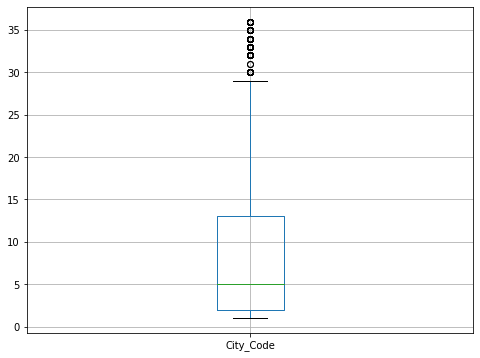

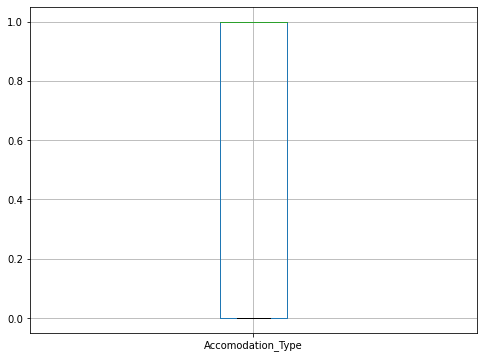

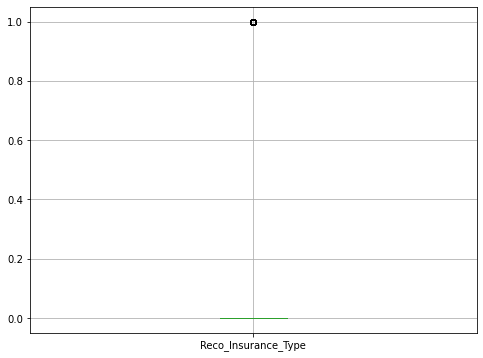

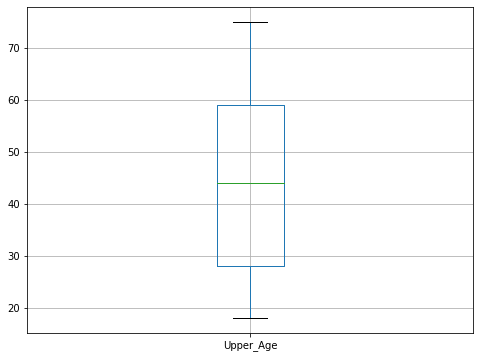

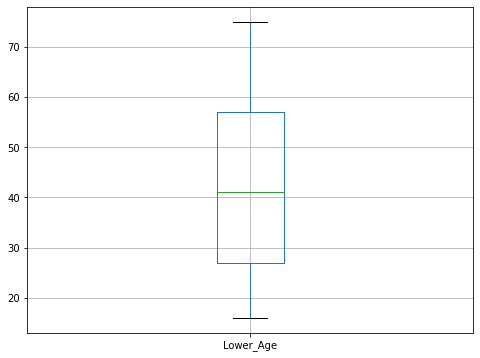

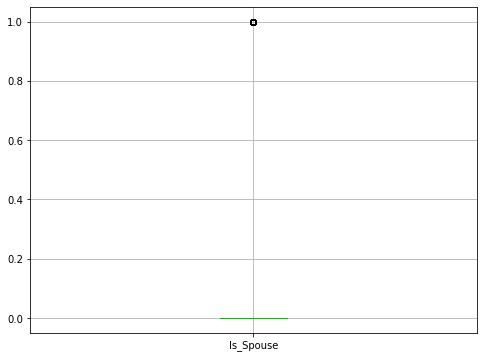

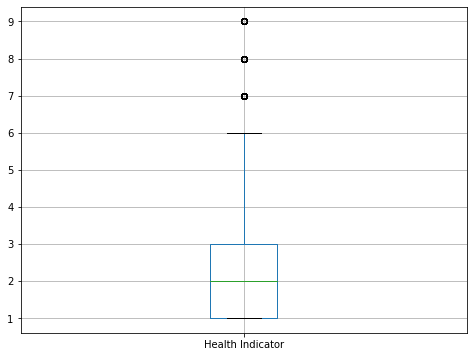

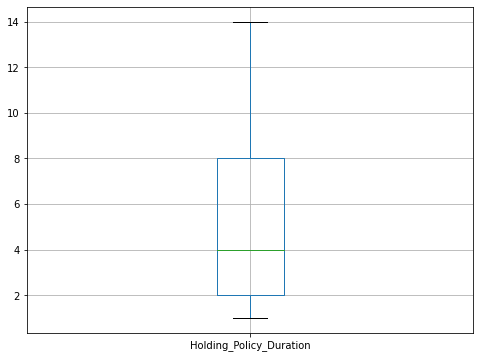

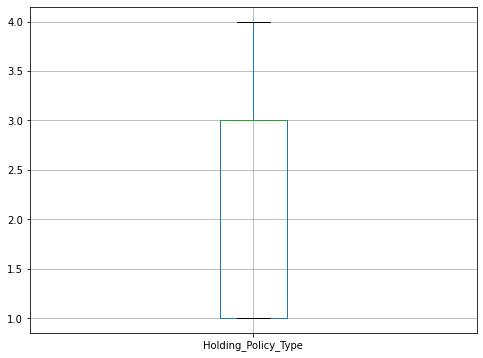

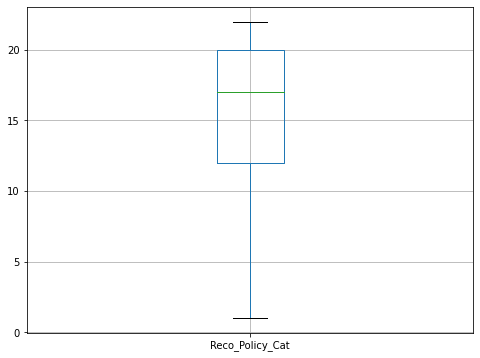

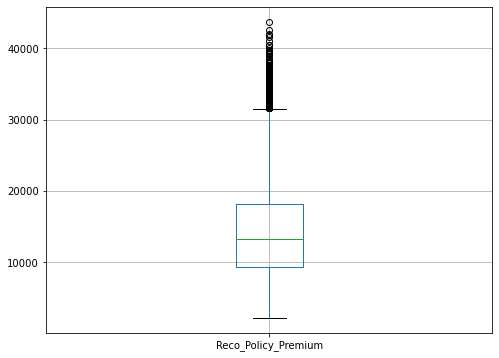

<Figure size 432x288 with 0 Axes>

In [74]:
for column in new_df_test:
    plt.figure(figsize=(8,6))
    fig=new_df_test[[column]].boxplot()
    plt.show()
plt.savefig("boxplot1")

<AxesSubplot:xlabel='Reco_Policy_Premium'>

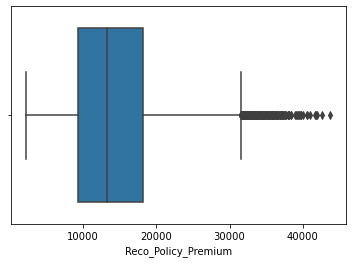

In [75]:
sns.boxplot(new_df_test['Reco_Policy_Premium'])

In [76]:
q1=new_df_test['Reco_Policy_Premium'].quantile(0.25)
q3=new_df_test['Reco_Policy_Premium'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit

31576.499999999996

<AxesSubplot:xlabel='Reco_Policy_Premium'>

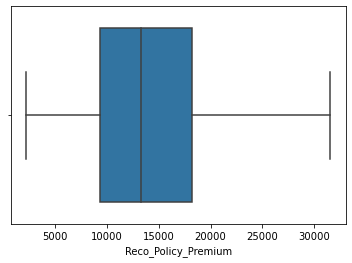

In [77]:
new_df_test['Reco_Policy_Premium']=np.where(new_df_test['Reco_Policy_Premium']>upper_limit,upper_limit,
                                             new_df_test['Reco_Policy_Premium'])
sns.boxplot(new_df_test['Reco_Policy_Premium'])

<AxesSubplot:ylabel='Density'>

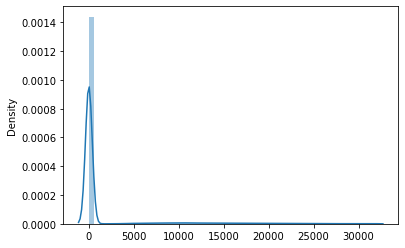

In [78]:
sns.distplot(new_df_test)

<AxesSubplot:>

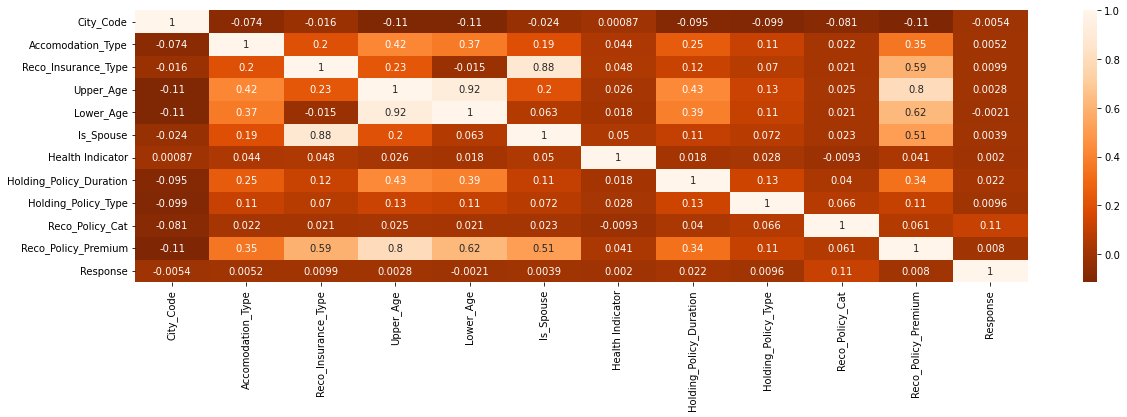

In [79]:
corr=new_df_train.corr()
plt.figure(figsize=(20,5))
sns.heatmap(corr,annot=True,cmap='Oranges_r')

In [80]:
#x=new_df_train.drop('Response',axis=1)
#y=new_df_train['Response']
#x_train,y_train=train_test_split(x,y,test_size=0.25,random_state=50,stratify=y)


#x=new_df_test.drop('Response',axis=1)
#y=new_df_test['Response']
#x_test,y_test=train_test_split(x,y,test_size=0.25,random_state=50,stratify=y)

#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

ValueError: too many values to unpack (expected 2)

In [114]:
#scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train)
#x_train

array([[0.37142857, 1.        , 0.        , ..., 1.        , 0.85714286,
        0.37610011],
       [0.05714286, 0.        , 0.        , ..., 0.66666667, 0.76190476,
        0.41474147],
       [0.02857143, 1.        , 0.        , ..., 0.66666667, 0.95238095,
        0.63531353],
       ...,
       [0.05714286, 0.        , 0.        , ..., 0.        , 0.85714286,
        0.65319032],
       [0.65714286, 1.        , 0.        , ..., 0.        , 0.04761905,
        0.46837184],
       [0.        , 1.        , 0.        , ..., 0.        , 0.85714286,
        0.58388339]])

In [115]:
#x_test = scaler.transform(x_test)
#x_test

array([[0.        , 1.        , 0.        , ..., 0.66666667, 0.85714286,
        0.39280803],
       [0.34285714, 0.        , 0.        , ..., 0.33333333, 0.95238095,
        0.38978273],
       [0.02857143, 1.        , 0.        , ..., 0.66666667, 0.95238095,
        0.59928493],
       ...,
       [0.08571429, 1.        , 0.        , ..., 0.66666667, 0.80952381,
        0.55486799],
       [0.74285714, 1.        , 0.        , ..., 0.        , 0.66666667,
        0.37871287],
       [0.31428571, 1.        , 0.        , ..., 0.33333333, 0.85714286,
        0.20627063]])

In [82]:
lr_model=LogisticRegression()
lr_model.fit(new_df_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [117]:
# test data
y_pred=lr_model.predict(x_test)

accuracy4=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy4)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.7600817545790425
confusion matrxi:
 [[9669 3052]
 [   0    0]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     12721
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76     12721
   macro avg       0.50      0.38      0.43     12721
weighted avg       1.00      0.76      0.86     12721



In [118]:
# train data
y_pred_train=lr_model.predict(x_train)

accuracy=accuracy_score(y_pred_train,y_train)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train)
print('classification report:\n',class_rep)

accuracy score: 0.7600429758130028
confusion matrxi:
 [[29004  9157]
 [    0     0]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     38161
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76     38161
   macro avg       0.50      0.38      0.43     38161
weighted avg       1.00      0.76      0.86     38161



In [119]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [120]:
# test data
y_pred=knn_model.predict(x_test)

accuracy4=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy4)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.7164531090323087
confusion matrxi:
 [[8755 2693]
 [ 914  359]]
classification report:
               precision    recall  f1-score   support

         0.0       0.91      0.76      0.83     11448
         1.0       0.12      0.28      0.17      1273

    accuracy                           0.72     12721
   macro avg       0.51      0.52      0.50     12721
weighted avg       0.83      0.72      0.76     12721



In [121]:
# train data
y_pred_train=knn_model.predict(x_train)

accuracy=accuracy_score(y_pred_train,y_train)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train)
print('classification report:\n',class_rep)

accuracy score: 0.7902308639710699
confusion matrxi:
 [[27504  6505]
 [ 1500  2652]]
classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.81      0.87     34009
         1.0       0.29      0.64      0.40      4152

    accuracy                           0.79     38161
   macro avg       0.62      0.72      0.64     38161
weighted avg       0.88      0.79      0.82     38161



In [122]:
knn_model=KNeighborsClassifier()
hyp={ 'n_neighbors':np.arange(1,10),
    'p':[1,2]}
rscv_knn_model=RandomizedSearchCV(knn_model,hyp,cv=5)
rscv_knn_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'p': [1, 2]})

In [124]:
# test data
y_pred=rscv_knn_model.predict(x_test)

accuracy4=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy4)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.7425516861881928
confusion matrxi:
 [[9301 2907]
 [ 368  145]]
classification report:
               precision    recall  f1-score   support

         0.0       0.96      0.76      0.85     12208
         1.0       0.05      0.28      0.08       513

    accuracy                           0.74     12721
   macro avg       0.50      0.52      0.47     12721
weighted avg       0.93      0.74      0.82     12721



In [125]:
# train data
y_pred_train=rscv_knn_model.predict(x_train)

accuracy=accuracy_score(y_pred_train,y_train)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train)
print('classification report:\n',class_rep)

accuracy score: 0.777652577238542
confusion matrxi:
 [[28511  7992]
 [  493  1165]]
classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.78      0.87     36503
         1.0       0.13      0.70      0.22      1658

    accuracy                           0.78     38161
   macro avg       0.56      0.74      0.54     38161
weighted avg       0.95      0.78      0.84     38161



In [126]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [127]:
# test data
y_pred=dt_model.predict(x_test)

accuracy4=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy4)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.6511280559704425
confusion matrxi:
 [[7341 2110]
 [2328  942]]
classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      9451
         1.0       0.31      0.29      0.30      3270

    accuracy                           0.65     12721
   macro avg       0.53      0.53      0.53     12721
weighted avg       0.64      0.65      0.65     12721



In [128]:
# train data
y_pred_train=dt_model.predict(x_train)

accuracy=accuracy_score(y_pred_train,y_train)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train)
print('classification report:\n',class_rep)

accuracy score: 0.9996593380676607
confusion matrxi:
 [[29004    13]
 [    0  9144]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29017
         1.0       1.00      1.00      1.00      9144

    accuracy                           1.00     38161
   macro avg       1.00      1.00      1.00     38161
weighted avg       1.00      1.00      1.00     38161



In [130]:
dt_model=DecisionTreeClassifier()

hyp={'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':np.arange(4,15),
    'min_samples_split':np.arange(5,20),
    'min_samples_leaf':np.arange(3,12),
    'max_features':['auto''log2','sqrt'],
    'random_state':np.arange(2,10)}

rscv_dt_model=RandomizedSearchCV(dt_model,hyp,cv=5)
rscv_dt_model.fit(x_train,y_train)
#rscv_dt_model.best_estimator_

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['autolog2', 'sqrt'],
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'random_state': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'splitter': ['best', 'random']})

In [131]:
# test data
y_pred=rscv_dt_model.predict(x_test)

accuracy4=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy4)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.7600817545790425
confusion matrxi:
 [[9668 3051]
 [   1    1]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     12719
         1.0       0.00      0.50      0.00         2

    accuracy                           0.76     12721
   macro avg       0.50      0.63      0.43     12721
weighted avg       1.00      0.76      0.86     12721



In [132]:
# train data
y_pred_train=rscv_dt_model.predict(x_train)

accuracy=accuracy_score(y_pred_train,y_train)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train)
print('classification report:\n',class_rep)

accuracy score: 0.7601215901050811
confusion matrxi:
 [[29002  9152]
 [    2     5]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     38154
         1.0       0.00      0.71      0.00         7

    accuracy                           0.76     38161
   macro avg       0.50      0.74      0.43     38161
weighted avg       1.00      0.76      0.86     38161



In [133]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [134]:
# test data
y_pred=rf_model.predict(x_test)

accuracy=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.7532426696014465
confusion matrxi:
 [[9452 2922]
 [ 217  130]]
classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.76      0.86     12374
         1.0       0.04      0.37      0.08       347

    accuracy                           0.75     12721
   macro avg       0.51      0.57      0.47     12721
weighted avg       0.95      0.75      0.84     12721



In [136]:
# train data
y_pred_train=rf_model.predict(x_train)

accuracy=accuracy_score(y_pred_train,y_train)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train)
print('classification report:\n',class_rep)

accuracy score: 0.9996331333036346
confusion matrxi:
 [[29003    13]
 [    1  9144]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29016
         1.0       1.00      1.00      1.00      9145

    accuracy                           1.00     38161
   macro avg       1.00      1.00      1.00     38161
weighted avg       1.00      1.00      1.00     38161



In [138]:
rf_model=RandomForestClassifier()

hyp={'n_estimators':np.arange(20,150),
    'criterion':['gini','entropy'],
    'max_features':['log2','auto','sqrt'],
     'max_depth':np.arange(4,15),
    'min_samples_split':np.arange(5,20),
    'min_samples_leaf':np.arange(3,12),
    'random_state':np.arange(2,10)}
rscv_rf_model=RandomizedSearchCV(rf_model,hyp,cv=5)
rscv_rf_model.fit(x_train,y_train)
#rscv_rf_model.best_estimator_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['log2', 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 20,  21,  22,  23,  24...
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]),
                                        'random_state': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [139]:
# test data
y_pred=rscv_rf_model.predict(x_test)

accuracy3=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy3)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)
print('classification report:\n',class_rep)

accuracy score: 0.7600817545790425
confusion matrxi:
 [[9669 3052]
 [   0    0]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     12721
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76     12721
   macro avg       0.50      0.38      0.43     12721
weighted avg       1.00      0.76      0.86     12721



In [140]:
# train data
y_pred_train=rscv_rf_model.predict(x_train)

accuracy=accuracy_score(y_pred_train,y_train)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train)
print('classification report:\n',class_rep)

accuracy score: 0.7600429758130028
confusion matrxi:
 [[29004  9157]
 [    0     0]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     38161
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76     38161
   macro avg       0.50      0.38      0.43     38161
weighted avg       1.00      0.76      0.86     38161



In [141]:
adb_model = AdaBoostClassifier()
adb_model.fit(x_train, y_train)

AdaBoostClassifier()

In [142]:
# test data
y_pred=adb_model.predict(x_test)

accuracy5=accuracy_score(y_pred,y_test)
print('accuracy score:',accuracy5)

cnf_mat=confusion_matrix(y_pred,y_test)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred,y_test)

print('classification report:\n',class_rep)

accuracy score: 0.7600817545790425
confusion matrxi:
 [[9669 3052]
 [   0    0]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     12721
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76     12721
   macro avg       0.50      0.38      0.43     12721
weighted avg       1.00      0.76      0.86     12721



In [143]:
# train data
y_pred_train=adb_model.predict(x_train)

accuracy=accuracy_score(y_pred_train,y_train)
print('accuracy score:',accuracy)

cnf_mat=confusion_matrix(y_pred_train,y_train)
print('confusion matrxi:\n',cnf_mat)

class_rep=classification_report(y_pred_train,y_train)
print('classification report:\n',class_rep)


accuracy score: 0.7600429758130028
confusion matrxi:
 [[29004  9157]
 [    0     0]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     38161
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76     38161
   macro avg       0.50      0.38      0.43     38161
weighted avg       1.00      0.76      0.86     38161

